In [1]:
import numpy as np
import scipy.io
import cv2
import os
import pandas as pd
import tensorflow as tf

/usr/local/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
label = scipy.io.loadmat('imagelabels.mat')
y = label['labels'][0]

data_y = []
data = []

In [3]:
dir = 'segmim/'
for dirname in os.listdir(dir):
    img_num = int(dirname[8:12])-1
    data_y.append(y[img_num]-1)
    img = cv2.imread(os.path.join(dir, dirname))
    resized = cv2.resize(img, (128,128))
    data.append(resized)

In [5]:
data = np.array(data)

In [6]:
data_new = data.reshape(len(data),128*128*3)

In [7]:
data_new.shape

(8189, 49152)

In [8]:
df = pd.DataFrame(data_new)

In [9]:
df['Labels'] = data_y

In [ ]:
df.to_csv('data.csv')

In [10]:
ids = scipy.io.loadmat('setid.mat')

In [11]:
ids['trnid'][0]

array([6765, 6755, 6768, ..., 8026, 8036, 8041], dtype=uint16)

In [26]:
pd.Series(data_y).value_counts()

50    258
76    251
45    196
72    194
88    184
     ... 
44     40
2      40
20     40
33     40
0      40
Length: 102, dtype: int64

In [34]:
y[0]

77

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,Labels
0,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,45
1,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,11
2,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,79
3,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,74
4,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,254,0,0,254,0,0,254,0,0,254,...,158,154,153,157,153,152,158,154,153,96
8185,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,65
8186,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,36
8187,254,0,0,254,0,0,254,0,0,254,...,254,0,0,254,0,0,254,0,0,76


In [14]:
train = ids['trnid'][0]-1
valid = ids['valid'][0]-1
test = ids['tstid'][0]-1

In [15]:
train_x = df.loc[train,:]
valid_x = df.loc[valid,:]
test_x = df.loc[test,:]

In [37]:
#train_x.to_csv('train.csv')
#valid_x.to_csv('valid.csv')
test_x.to_csv('test.csv')

In [10]:
#c = (df['Labels'].value_counts()[df['Labels'].value_counts() > 100])
#c = (df['Labels'].value_counts()[(df['Labels'].value_counts() > 50) & (df['Labels'].value_counts() < 100)]).index
#d = (df['Labels'].value_counts()[df['Labels'].value_counts() > 100]).index

In [10]:
for lab in c:
    df.drop(df.query('Labels == '+str(lab)).sample(frac=.30).index,inplace =True)

In [ ]:
for l in d:
    df.drop(df.query('Labels == '+str(l)).sample(frac=.75).index,inplace =True)

In [39]:
len(df)

8189

In [40]:
df.to_csv('data_1_1.csv')

In [23]:
len(test_x['Labels'])

6149

In [13]:
train_x['Labels'].value_counts()

50    32
76    29
72    24
80    23
87    22
      ..
6      3
69     3
85     3
24     2
26     1
Name: Labels, Length: 102, dtype: int64

In [17]:
X = pd.read_csv('train.csv')

In [14]:
X = df.iloc[:,:-1].values

In [15]:
Y = df['Labels'].values

In [16]:
X.shape

(8189, 49152)

In [17]:
X = X.reshape(len(df),128,128,3)

In [18]:
from sklearn.preprocessing import OneHotEncoder
Y_trans = OneHotEncoder().fit_transform(Y.reshape(-1,1)).toarray()

In [19]:
Y_trans.shape

(8189, 6)

y = 87


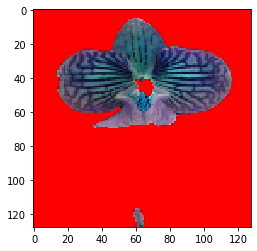

In [25]:
import matplotlib.pyplot as plt
index = 1500
plt.imshow(X[index])
print("y = " + str((Y[index])))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train_og,X_test_og,Y_train_og,Y_test_og = train_test_split(X,Y_trans,test_size = 0.2,random_state = 10)

In [22]:
Y_train_og

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [23]:
from sklearn.preprocessing import OneHotEncoder
X_train = X_train_og/255.
X_test = X_test_og/255.
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train_og.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test_og.shape))
conv_layers = {}

MemoryError: Unable to allocate 2.40 GiB for an array with shape (6551, 128, 128, 3) and data type float64

In [30]:
X_train.shape

(3673, 128, 128, 3)

In [155]:
def batches(X_train,Y_train):
    X_train_set = []
    Y_train_set = []
    for i in range(len(X_train)//500):
        X_train_set.append(X_train[i*500:(i+1)*500,:,:,:])
        Y_train_set.append(Y_train[i*500:(i+1)*500,:])
    return X_train_set,Y_train_set    

In [150]:
for x,y in zip(X_train_set,Y_train_set):
    a,b = x,y
    print(a.shape)

(500, 128, 128, 3)
(500, 128, 128, 3)
(500, 128, 128, 3)
(500, 128, 128, 3)
(500, 128, 128, 3)
(500, 128, 128, 3)
(500, 128, 128, 3)


In [136]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, shape=(None, n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32, shape=(None, n_y))
    return X, Y

In [137]:
def initialize_parameters():
    
    tf.set_random_seed(1)                              #
    W1 = tf.get_variable("W1", [8,8,3,8], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W2 =tf.get_variable("W2", [4,4,8,16], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [138]:
def forward_propagation(X, parameters): 
    W1 = parameters['W1']
    W2 = parameters['W2']
   
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 102, activation_fn=None)
    ### END CODE HERE ###

    return Z3

In [139]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    ### END CODE HERE ###
    
    return cost

In [158]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0
            X_set , Y_set = batches(X_train, Y_train)

            for x,y in zip(X_set,Y_set):

                # Select a minibatch
                minibatch_X, minibatch_Y = x,y
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

In [ ]:
_, _, parameters = model(X_train, Y_train_og, X_test, Y_test_og)

In [42]:
batch = random_mini_batches(X_train_1, Y_train_1, 50, 1)

In [44]:
batch[1]

(array([[[[0.29803922, 0.78039216, 0.62352941],
          [0.25098039, 0.70196078, 0.55686275],
          [0.28627451, 0.69803922, 0.57647059],
          ...,
          [0.17254902, 0.25490196, 0.29411765],
          [0.17254902, 0.25098039, 0.29803922],
          [0.17254902, 0.2627451 , 0.29019608]],
 
         [[0.09803922, 0.30196078, 0.21960784],
          [0.03137255, 0.17647059, 0.09019608],
          [0.10196078, 0.2745098 , 0.18431373],
          ...,
          [0.14901961, 0.23137255, 0.36078431],
          [0.14901961, 0.25098039, 0.36862745],
          [0.14117647, 0.24313725, 0.36078431]],
 
         [[0.03921569, 0.17254902, 0.07058824],
          [0.05490196, 0.16862745, 0.06666667],
          [0.04705882, 0.19215686, 0.07843137],
          ...,
          [0.05098039, 0.13333333, 0.14117647],
          [0.03137255, 0.12156863, 0.10588235],
          [0.07058824, 0.18039216, 0.11764706]],
 
         ...,
 
         [[0.02352941, 0.01960784, 0.00392157],
          [0.01960

In [38]:
img_labels = scipy.io.loadmat("imagelabels.mat")

In [39]:
img_labels

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}